Source link : https://data.buffalony.gov/Public-Safety/Crime-Incidents/d6g9-xbgu/about_data

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
from scipy import stats
from shapely.geometry import Point
import folium
from folium.plugins import HeatMap
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the CSV file into a DataFrame
data = pd.read_csv('C:/Users/archi/Desktop/DIC/buffalo_crime.csv')
data

Case Number       Incident Datetime  Incident ID Incident Type Primary  \
0       16-1660403  06/14/2016 01:20:00 AM          NaN               ASSAULT   
1       16-3480266  12/13/2016 05:00:00 AM          NaN         LARCENY/THEFT   
2       20-2010167  07/19/2020 03:09:00 AM          NaN               ASSAULT   
3       14-3210732  11/17/2014 08:08:00 AM          NaN         LARCENY/THEFT   
4       15-1100268  04/20/2015 10:22:00 AM          NaN         LARCENY/THEFT   
...            ...                     ...          ...                   ...   
314315  24-2710149  09/27/2024 04:05:05 AM          NaN                   UUV   
314316  24-2630209  09/19/2024 07:15:55 AM          NaN              BURGLARY   
314317  24-2710221  09/26/2024 06:35:00 PM          NaN         LARCENY/THEFT   
314318  24-2700544  09/16/2024 04:35:00 PM          NaN                   UUV   
314319  24-2611064  09/16/2024 12:00:00 AM          NaN         LARCENY/THEFT   

                                     Incident Description  \
0                                                 ASSAULT   
1                                           LARCENY/THEFT   
2       Buffalo Police are investigating this report o...   
3                                           LARCENY/THEFT   
4                                           LARCENY/THEFT   
...                                                   ...   
314315  Buffalo Police are investigating this report o...   
314316  Buffalo Police are investigating this report o...   
314317  Buffalo Police are investigating this report o...   
314318  Buffalo Police are investigating this report o...   
314319  Buffalo Police are investigating this report o...   

       Parent Incident Type  Hour of Day Day of Week  \
0                   Assault            1     Tuesday   
1                     Theft            5     Tuesday   
2                   Assault            3      Sunday   
3                     Theft            8      Monday   
4                     Theft           10      Monday   
...                     ...          ...         ...   
314315     Theft of Vehicle            4      Friday   
314316  Breaking & Entering            7    Thursday   
314317                Theft            7      Friday   
314318     Theft of Vehicle           14    Thursday   
314319                Theft           19     Tuesday   

                            Address     City  ... Census Block Group  \
0       E AMHERST ST & E AMHERST ST  Buffalo  ...                  2   
1           1000 Block E LOVEJOY ST  Buffalo  ...                  4   
2         GRIDER ST & KENSINGTON WB  Buffalo  ...                NaN   
3             2100 Block ELMWOOD AV  Buffalo  ...                  2   
4             2100 Block ELMWOOD AV  Buffalo  ...                  2   
...                             ...      ...  ...                ...   
314315       100 Block E DELAVAN AV  Buffalo  ...                  1   
314316         500 Block MOSELLE ST  Buffalo  ...                  1   
314317        1900 Block ELMWOOD AV  Buffalo  ...                  3   
314318           600 Block PERRY ST  Buffalo  ...                  4   
314319            100 Block GREY ST  Buffalo  ...                  4   

       Census Block 2010 Census Tract  2010 Census Block Group  \
0              2003                 55                       2   
1              4001                 23                       4   
2               NaN                NaN                     NaN   
3              2007                 56                       2   
4              2007                 56                       2   
...             ...                ...                     ...   
314315         1010              52.02                       1   
314316         1003                 34                       1   
314317         3005                 50                       3   
314318         4001                164                       2   
314319         4001                16

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314320 entries, 0 to 314319
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Case Number              314320 non-null  object 
 1   Incident Datetime        314320 non-null  object 
 2   Incident ID              0 non-null       float64
 3   Incident Type Primary    314320 non-null  object 
 4   Incident Description     314320 non-null  object 
 5   Parent Incident Type     314320 non-null  object 
 6   Hour of Day              314320 non-null  int64  
 7   Day of Week              314320 non-null  object 
 8   Address                  314282 non-null  object 
 9   City                     314320 non-null  object 
 10  State                    314320 non-null  object 
 11  Location                 308091 non-null  object 
 12  Latitude                 313370 non-null  object 
 13  Longitude                313370 non-null  object 
 14  Crea

In [4]:
data.describe()

Incident ID    Hour of Day  updated_at
count          0.0  314320.000000         0.0
mean           NaN      11.909344         NaN
std            NaN       7.213956         NaN
min            NaN       0.000000         NaN
25%            NaN       6.000000         NaN
50%            NaN      13.000000         NaN
75%            NaN      18.000000         NaN
max            NaN      23.000000         NaN

In [5]:
data['Incident Type Primary'].value_counts()

Incident Type Primary
LARCENY/THEFT               135713
ASSAULT                      62837
BURGLARY                     56552
UUV                          30532
ROBBERY                      19403
RAPE                          3001
SEXUAL ABUSE                  2780
THEFT OF SERVICES             2029
MURDER                         994
AGGR ASSAULT                   125
Assault                        115
Breaking & Entering             84
CRIM NEGLIGENT HOMICIDE         71
Theft                           37
MANSLAUGHTER                    18
AGG ASSAULT ON P/OFFICER        10
Robbery                          6
Sexual Assault                   5
Theft of Vehicle                 4
Other Sexual Offense             2
Homicide                         1
SODOMY                           1
Name: count, dtype: int64

In [6]:
# Preview the data to understand its structure
print(data.head())

  Case Number       Incident Datetime  Incident ID Incident Type Primary  \
0  16-1660403  06/14/2016 01:20:00 AM          NaN               ASSAULT   
1  16-3480266  12/13/2016 05:00:00 AM          NaN         LARCENY/THEFT   
2  20-2010167  07/19/2020 03:09:00 AM          NaN               ASSAULT   
3  14-3210732  11/17/2014 08:08:00 AM          NaN         LARCENY/THEFT   
4  15-1100268  04/20/2015 10:22:00 AM          NaN         LARCENY/THEFT   

                                Incident Description Parent Incident Type  \
0                                            ASSAULT              Assault   
1                                      LARCENY/THEFT                Theft   
2  Buffalo Police are investigating this report o...              Assault   
3                                      LARCENY/THEFT                Theft   
4                                      LARCENY/THEFT                Theft   

   Hour of Day Day of Week                      Address     City  ...  \
0      


        Cleaning Steps
        

1) Renaming Columns
In this step, column names in the dataset are standardized to maintain consistency. This is done by converting all column names to lowercase and replacing any spaces with underscores

In [9]:
#Step 1: Rename Columns for Consistency
data.columns = data.columns.str.lower().str.replace(' ', '_')

- Incident ID: Typically a unique identifier for each record, not necessary for analysis.
- Created At & Updated At: These columns track when the data was entered or modified, which is not relevant for analyzing crime patterns.

2) Eliminating columns with most null values columns that contain mostly or entirely missing values,such as ’incident id’, ’updated at’ and ’created at’ are removed from the dataset. These columns are not useful for analysis and provide no valuable information. Dropping them simplifies the dataset and enhances processing efficiency

In [12]:
#Step 2: Remove Columns with most of the values as None 
data.drop(columns=['incident_id', 'updated_at','created_at'], inplace=True)

In [13]:
data

case_number       incident_datetime incident_type_primary  \
0       16-1660403  06/14/2016 01:20:00 AM               ASSAULT   
1       16-3480266  12/13/2016 05:00:00 AM         LARCENY/THEFT   
2       20-2010167  07/19/2020 03:09:00 AM               ASSAULT   
3       14-3210732  11/17/2014 08:08:00 AM         LARCENY/THEFT   
4       15-1100268  04/20/2015 10:22:00 AM         LARCENY/THEFT   
...            ...                     ...                   ...   
314315  24-2710149  09/27/2024 04:05:05 AM                   UUV   
314316  24-2630209  09/19/2024 07:15:55 AM              BURGLARY   
314317  24-2710221  09/26/2024 06:35:00 PM         LARCENY/THEFT   
314318  24-2700544  09/16/2024 04:35:00 PM                   UUV   
314319  24-2611064  09/16/2024 12:00:00 AM         LARCENY/THEFT   

                                     incident_description  \
0                                                 ASSAULT   
1                                           LARCENY/THEFT   
2       Buffalo Police are investigating this report o...   
3                                           LARCENY/THEFT   
4                                           LARCENY/THEFT   
...                                                   ...   
314315  Buffalo Police are investigating this report o...   
314316  Buffalo Police are investigating this report o...   
314317  Buffalo Police are investigating this report o...   
314318  Buffalo Police are investigating this report o...   
314319  Buffalo Police are investigating this report o...   

       parent_incident_type  hour_of_day day_of_week  \
0                   Assault            1     Tuesday   
1                     Theft            5     Tuesday   
2                   Assault            3      Sunday   
3                     Theft            8      Monday   
4                     Theft           10      Monday   
...                     ...          ...         ...   
314315     Theft of Vehicle            4      Friday   
314316  Breaking & Entering            7    Thursday   
314317                Theft            7      Friday   
314318     Theft of Vehicle           14    Thursday   
314319                Theft           19     Tuesday   

                            address     city state  ... census_block_group  \
0       E AMHERST ST & E AMHERST ST  Buffalo    NY  ...                  2   
1           1000 Block E LOVEJOY ST  Buffalo    NY  ...                  4   
2         GRIDER ST & KENSINGTON WB  Buffalo    NY  ...                NaN   
3             2100 Block ELMWOOD AV  Buffalo    NY  ...                  2   
4             2100 Block ELMWOOD AV  Buffalo    NY  ...                  2   
...                             ...      ...   ...  ...                ...   
314315       100 Block E DELAVAN AV  Buffalo    NY  ...                  1   
314316         500 Block MOSELLE ST  Buffalo    NY  ...                  1   
314317        1900 Block ELMWOOD AV  Buffalo    NY  ...                  3   
314318           600 Block PERRY ST  Buffalo    NY  ...                  4   
314319            100 Block GREY ST  Buffalo    NY  ...                  4   

       census_block 2010_census_tract_ 2010_census_block_group  \
0              2003                 55                       2   
1              4001                 23                       4   
2               NaN                NaN                     NaN   
3              2007                 56                       2   
4              2007                 56                       2   
...             ...                ...                     ...   
314315         1010              52.02                       1   
314316         1003                 34                       1   
314317         3005                 50                       3   
314318         4001                164                       2   
314319         4001                166                       4   

       2010_census_block police_district tractce20 geo

3) Handling null values : In this step, we check for any missing values in the rows.
After identifying rows with null values, those rows are removed from the dataset. This ensures that the dataset contains only complete records, which can improve the quality of the analysis

In [15]:
#Step 3: Check for null values and drop those rows 
data.isnull().sum()
data.dropna(inplace=True)


The columns were removed for the following reasons:
- Census Tract, Census Block, 2010 Census Tract, 2010 Census Block Group, 2010 Census Block: These columns provide detailed geographic identifiers that may be redundant if other location data (like latitude and longitude) is used.
- TRACTCE20, GEOID20_tract, GEOID20_blockgroup, GEOID20_block: Similar to the census data, these are detailed geographic identifiers that may not add value if broader geographic analysis is sufficient.

4) Columns that do not contribute to the analysis are identified and removed. These are the columns with irrelevant information for the current analysis goals. By dropping these unnecessary columns, the dataset becomes more focused and manageable

In [19]:
# Step 4 Remove Redundant Columns
redundant_columns = ['parent_incident_type', 'state' ,'city', 'location','census_tract', 'census_block',
                     '2010_census_tract_', '2010_census_block_group', '2010_census_block',
                     'tractce20', 'geoid20_tract', 'geoid20_blockgroup', 'geoid20_block']
data.drop(columns=redundant_columns, inplace=True)




5) The incident datetime column is split into proper date time column. After splitting the date and time columns are separated into two different columns and the original merged column is then dropped as it is no longer needed in its combined form

In [31]:
#Step 5: split columns
data['incident_datetime'] = pd.to_datetime(data['incident_datetime'], errors='coerce')
data['incident_date'] = data['incident_datetime'].dt.date
data['incident_time'] = data['incident_datetime'].dt.time
data.drop(columns=['incident_datetime'], inplace=True)
print(data.head())


  case_number incident_type_primary incident_description  hour_of_day  \
0  16-1660403               ASSAULT              ASSAULT            1   
1  16-3480266         LARCENY/THEFT        LARCENY/THEFT            5   
3  14-3210732         LARCENY/THEFT        LARCENY/THEFT            8   
4  15-1100268         LARCENY/THEFT        LARCENY/THEFT           10   
5  15-1000814              BURGLARY             BURGLARY            3   

  day_of_week                      address latitude longitude zip_code  \
0     Tuesday  E AMHERST ST & E AMHERST ST   42.938   -78.889    14207   
1     Tuesday      1000 Block E LOVEJOY ST   42.889   -78.809    14206   
3      Monday        2100 Block ELMWOOD AV   42.954   -78.879    14207   
4      Monday        2100 Block ELMWOOD AV   42.954   -78.879    14207   
5      Friday        400 Block GLENWOOD AV   42.913   -78.848    14208   

    neighborhood council_district council_district_2011 census_block_group  \
0  Grant-Amherst            NORTH     

6) Data types for certain columns are adjusted to ensure consistency. Latitude and longitude values are converted to numeric (float), with any errors during conversion being set to NaN. Rows with missing values for latitude or longitude are then optionally removed. Additionally,
the hour of day column is explicitly converted to an integer to ensure proper data type alignment for further analysis.

In [33]:
# Step 6: Change Data Types
data['latitude'] = pd.to_numeric(data['latitude'], errors='coerce')
data['longitude'] = pd.to_numeric(data['longitude'], errors='coerce')
print(data[['latitude', 'longitude']].isnull().sum())
data.dropna(subset=['latitude', 'longitude'], inplace=True)
data['hour_of_day'] = data['hour_of_day'].astype(int)

latitude     0
longitude    0
dtype: int64


7) In this step, categorical text data is standardized by converting all values to lowercase. This ensures uniformity in the dataset, making it easier to group, filter, or analyze text-based columns without issues caused by case sensitivity.

In [35]:
# Step 7: Standardize Categorical Values
data['incident_type_primary'] = data['incident_type_primary'].str.lower()
data['incident_description'] = data['incident_description'].str.lower()

8) The incident date column is converted into a proper datetime format. From this, new features such as the year, month, and day are extracted into separate columns (year, month, and day). This helps break down the date information into more granular components for easier time-based analysis.

In [40]:
# Step 8. Create new features
data['incident_date'] = pd.to_datetime(data['incident_date'], format='%m/%d/%Y', errors='coerce')
data['year'] = data['incident_date'].dt.year
data['month'] = data['incident_date'].dt.month
data['day'] = data['incident_date'].dt.day


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308003 entries, 0 to 314319
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   case_number            308003 non-null  object        
 1   incident_type_primary  308003 non-null  object        
 2   incident_description   308003 non-null  object        
 3   hour_of_day            308003 non-null  int32         
 4   day_of_week            308003 non-null  object        
 5   address                308003 non-null  object        
 6   latitude               308003 non-null  float64       
 7   longitude              308003 non-null  float64       
 8   zip_code               308003 non-null  object        
 9   neighborhood           308003 non-null  object        
 10  council_district       308003 non-null  object        
 11  council_district_2011  308003 non-null  object        
 12  census_block_group     308003 non-null  object   

9) This step involves classifying incidents into different severity levels (such as High, Medium, or Low) depending on the type of incident. A function is created to determine the severity level by identifying specific keywords in the incident type primary column. For instance,incidents that include ”assault” or ”robbery” are marked as ”High,” while those involving ”theft” or ”burglary” are categorized as ”Medium.” Any remaining incidents are classified as ”Low.” The newly added severity column helps prioritize responses and allocate resources accordingly

In [45]:
#Step 9: Create a New Categorical Variable for Incident Severity
def categorize_severity(incident_type_primary):
    if 'assault' in incident_type_primary or 'robbery' in incident_type_primary:
        return 'High'
    elif 'theft' in incident_type_primary or 'burglary' in incident_type_primary:
        return 'Medium'
    else:
        return 'Low'

# Apply the function to create a new 'severity' column
data['severity'] = data['incident_type_primary'].apply(categorize_severity)

10) In this step, incidents are counted based on their severity level. A bar chart is created to visualize the distribution of crime severity, with the x-axis representing the severity
levels (e.g., High, Medium, Low) and the y-axis indicating the number of incidents for each level

In [48]:
# Step 10
data = data[(data['latitude'].between(42.8, 43.0)) & (data['longitude'].between(-79.0, -78.7))]
data

case_number incident_type_primary  \
0       16-1660403               assault   
1       16-3480266         larceny/theft   
3       14-3210732         larceny/theft   
4       15-1100268         larceny/theft   
5       15-1000814              burglary   
...            ...                   ...   
314315  24-2710149                   uuv   
314316  24-2630209              burglary   
314317  24-2710221         larceny/theft   
314318  24-2700544                   uuv   
314319  24-2611064         larceny/theft   

                                     incident_description  hour_of_day  \
0                                                 assault            1   
1                                           larceny/theft            5   
3                                           larceny/theft            8   
4                                           larceny/theft           10   
5                                                burglary            3   
...                                                   ...          ...   
314315  buffalo police are investigating this report o...            4   
314316  buffalo police are investigating this report o...            7   
314317  buffalo police are investigating this report o...            7   
314318  buffalo police are investigating this report o...           14   
314319  buffalo police are investigating this report o...           19   

       day_of_week                      address  latitude  longitude zip_code  \
0          Tuesday  E AMHERST ST & E AMHERST ST    42.938    -78.889    14207   
1          Tuesday      1000 Block E LOVEJOY ST    42.889    -78.809    14206   
3           Monday        2100 Block ELMWOOD AV    42.954    -78.879    14207   
4           Monday        2100 Block ELMWOOD AV    42.954    -78.879    14207   
5           Friday        400 Block GLENWOOD AV    42.913    -78.848    14208   
...            ...                          ...       ...        ...      ...   
314315      Friday       100 Block E DELAVAN AV    42.922    -78.853    14208   
314316    Thursday         500 Block MOSELLE ST    42.918    -78.825    14215   
314317      Friday        1900 Block ELMWOOD AV    42.951    -78.878    14216   
314318    Thursday           600 Block PERRY ST    42.872    -78.853    14210   
314319     Tuesday            100 Block GREY ST    42.896    -78.849    14211   

             neighborhood council_district council_district_2011  \
0           Grant-Amherst            NORTH                 NORTH   
1                 Lovejoy          LOVEJOY               LOVEJOY   
3             West Hertel            NORTH                 NORTH   
4             West Hertel            NORTH                 NORTH   
5             Masten Park           MASTEN                MASTEN   
...                   ...              ...                   ...   
314315        Hamlin Park           MASTEN                MASTEN   
314316     Delavan Grider           MASTEN                MASTEN   
314317         North Park            NORTH                 NORTH   
314318           Ellicott         FILLMORE              FILLMORE   
314319  Broadway Fillmore         ELLICOTT              ELLICOTT   

       census_block_group police_district incident_date incident_time  year  \
0                       2      District D    2016-06-14      01:20:00  2016   
1                       4      District C    2016-12-13      05:00:00  2016   
3                       2      District D    2014-11-17      08:08:00  2014   
4                       2      District D    2015-04-20      10:22:00  2015   
5                       3      District C    2015-04-10      03:00:00  2015   
...                   ...             ...           ...           ...   ...   
314315                  1      District E    2024-09-27      04:05:05  2024   
314316                  1      District E    2024-09-19      07:15:55  2024   
314317                  3      District D    2024-09-26      18:35:00  2024   
314318   

11 ) In this step, incidents are grouped by year and month to track trends over time. The monthly counts are converted into readable month names, and a line plot is created to visualize crime trends across different years. Each year is represented by a different color on the gradient
palette, helping to compare changes in crime incidents over months and years.

In [51]:
# Step 11 
# Removing years before 2000 , because the crimes committed are in negligible count 
data = data[data['year'] >= 2000]

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307914 entries, 0 to 314319
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   case_number            307914 non-null  object        
 1   incident_type_primary  307914 non-null  object        
 2   incident_description   307914 non-null  object        
 3   hour_of_day            307914 non-null  int32         
 4   day_of_week            307914 non-null  object        
 5   address                307914 non-null  object        
 6   latitude               307914 non-null  float64       
 7   longitude              307914 non-null  float64       
 8   zip_code               307914 non-null  object        
 9   neighborhood           307914 non-null  object        
 10  council_district       307914 non-null  object        
 11  council_district_2011  307914 non-null  object        
 12  census_block_group     307914 non-null  object   

## EDA

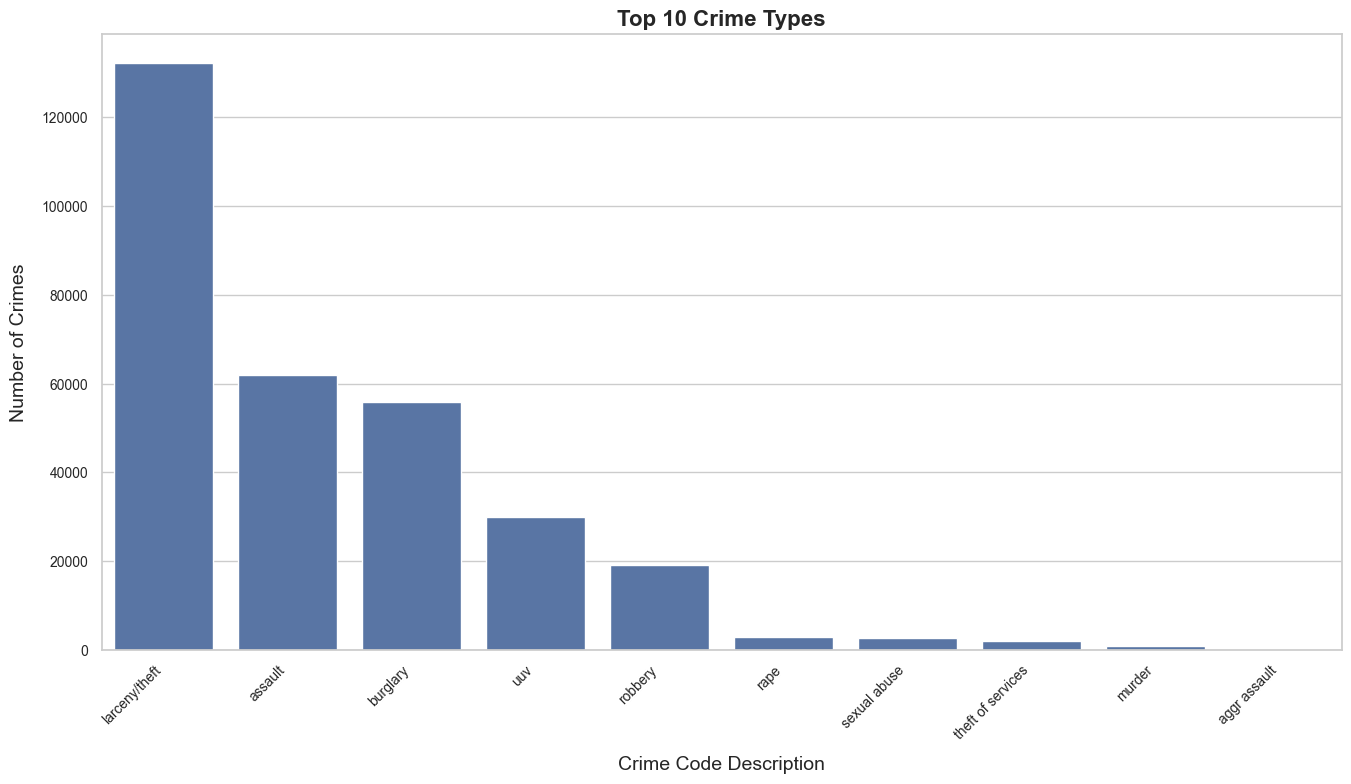

Total number of crimes committed: 307914


In [56]:
# 1
# Top 10 crimes 
crime_counts = data['incident_type_primary'].value_counts()
sns.set(style="whitegrid")

# Plotting the distribution 
plt.figure(figsize=(16, 8))
sns.barplot(x=crime_counts.index[:10], y=crime_counts.values[:10])
plt.xticks(rotation=45)
plt.title('Top 10 Crime Types',fontsize=16, fontweight='bold')
plt.xlabel('Crime Code Description',fontsize=14, labelpad=10)
plt.ylabel('Number of Crimes',fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.show()

total_crimes = data.shape[0]
print(f'Total number of crimes committed: {total_crimes}')

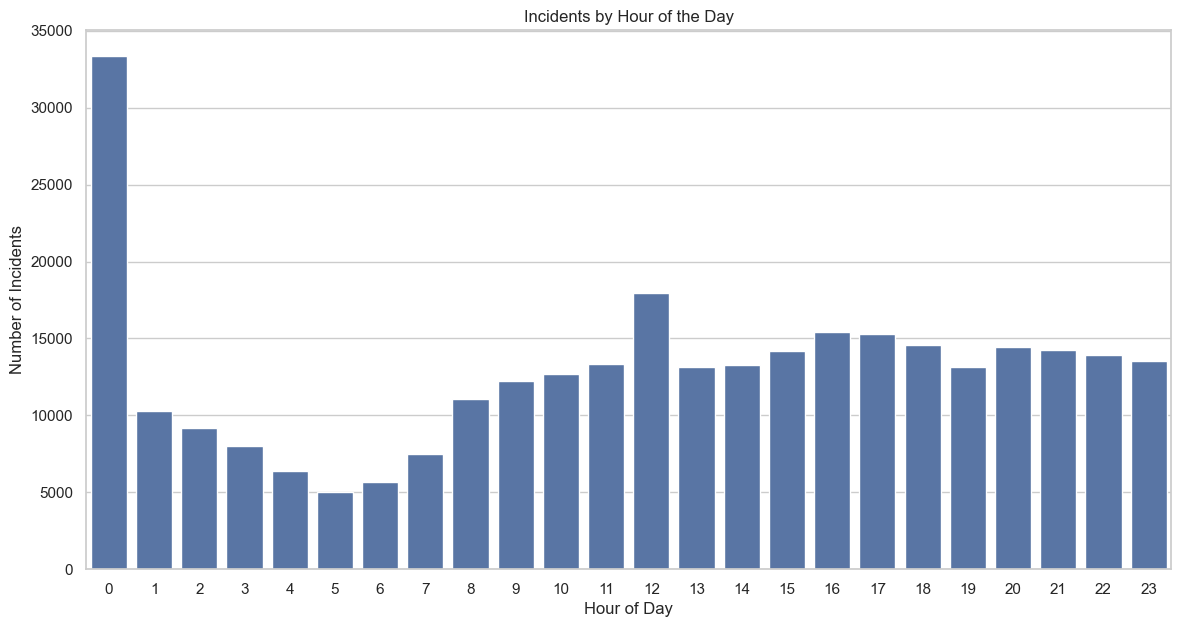

In [57]:
#2
#Visualize the distribution of incidents by hour of the day.

plt.figure(figsize=(14, 7))
sns.countplot(data=data, x='hour_of_day')
plt.title('Incidents by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Incidents')
plt.show()



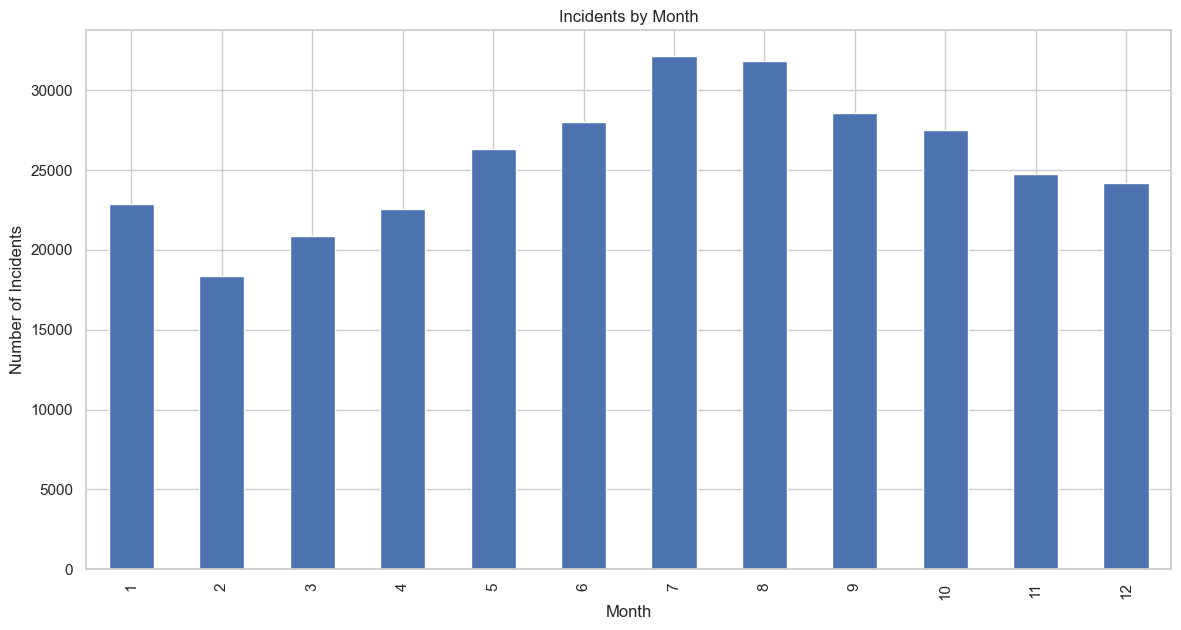

In [59]:
#3. 
#we Plot the number of incidents over the months to Analyze trends over time.
monthly_incidents = data['month'].value_counts().sort_index()
monthly_incidents.plot(kind='bar', figsize=(14, 7))
plt.title('Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.show()


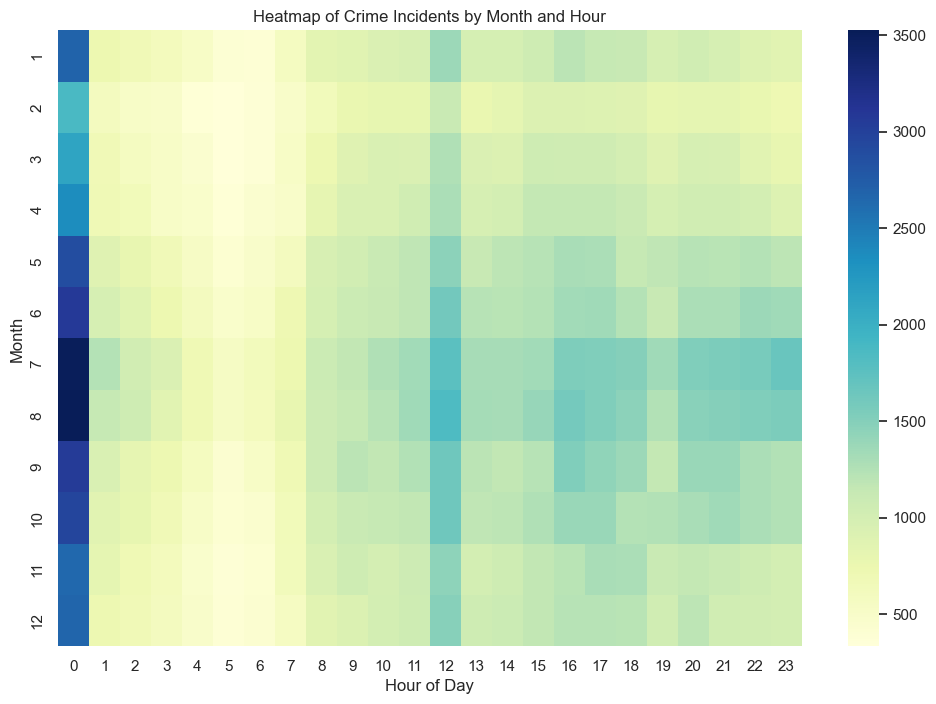

In [60]:
#4 Heatmap of Crime Incidents
#a heatmap to show incidents by month and hour.
heatmap_data = data.groupby(['month', 'hour_of_day']).size().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Heatmap of Crime Incidents by Month and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Month')
plt.show()


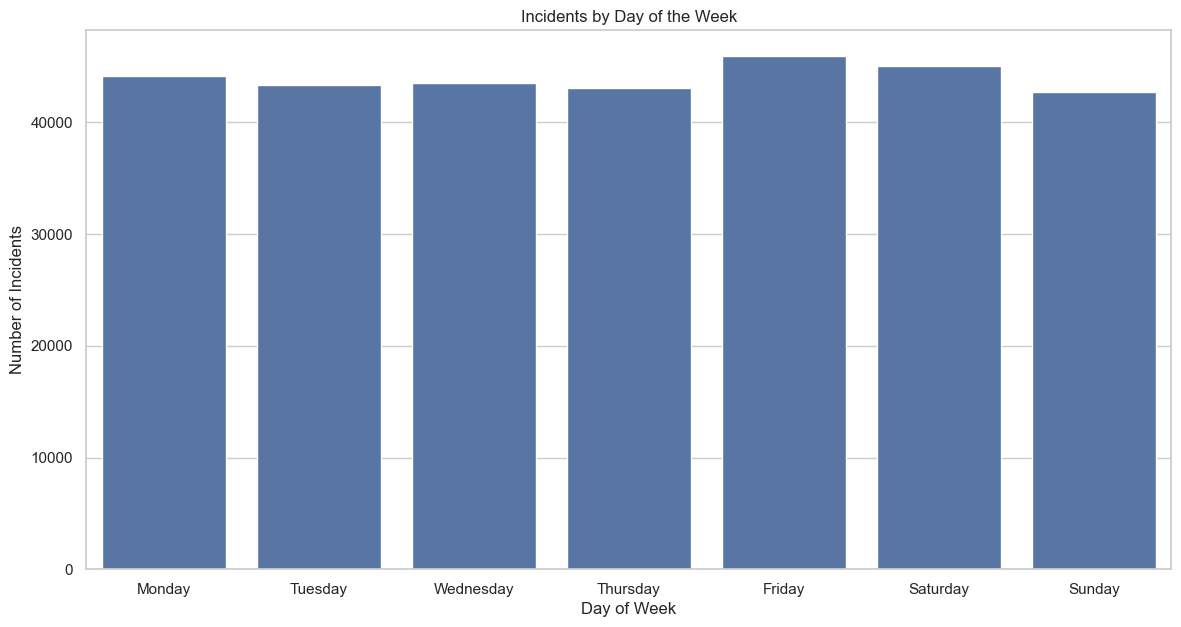

In [62]:
#5. Daily Trends
# a bar plot for incidents by day_of_week to Investigate crime rates by day of the week.
plt.figure(figsize=(14, 7))
sns.countplot(data=data, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Incidents by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Incidents')
plt.show()


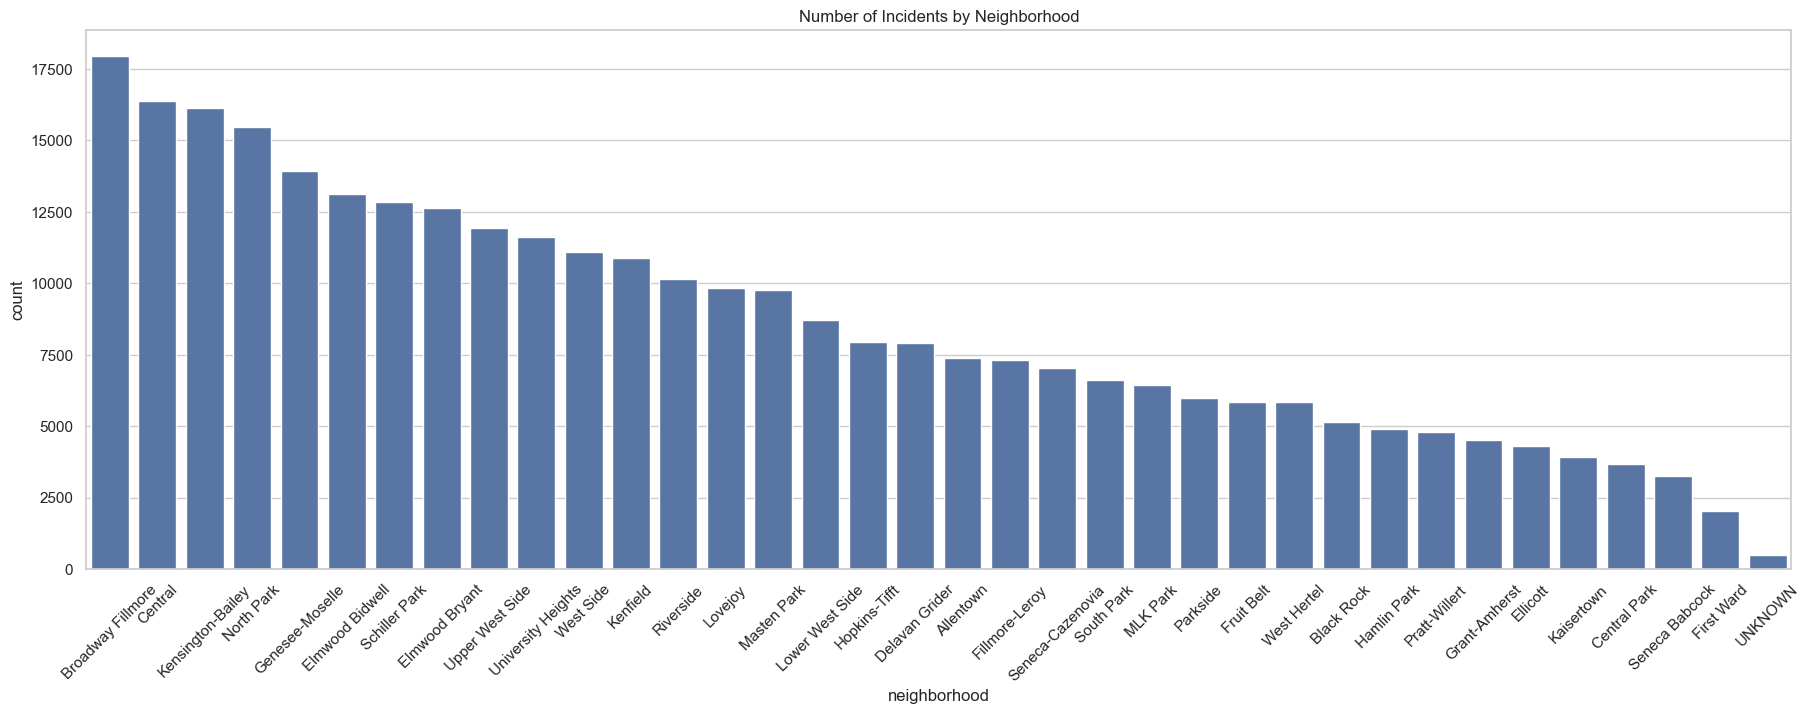

In [64]:
#6. Geographic Distribution
# Create a bar chart of incidents by neighborhood to Visualize crime incidents across neighborhoods.

plt.figure(figsize=(22, 7))
sns.countplot(data=data, x='neighborhood', order=data['neighborhood'].value_counts().index)
plt.title('Number of Incidents by Neighborhood')
plt.xticks(rotation=45)
plt.show()


In [66]:
#7. Crime Incidents Heatmap
# Create a heatmap of incidents using latitude and longitude to Identify high-crime areas using geographic data.

map = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=12)
heat_data = [[row['latitude'], row['longitude']] for index, row in data.iterrows()]
HeatMap(heat_data).add_to(map)
map



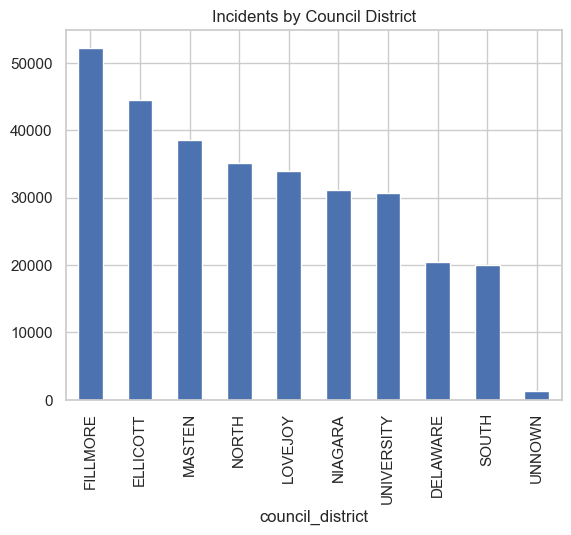

In [67]:
# 8
district_counts = data['council_district'].value_counts()
district_counts.plot(kind='bar')
plt.title('Incidents by Council District')
plt.show()


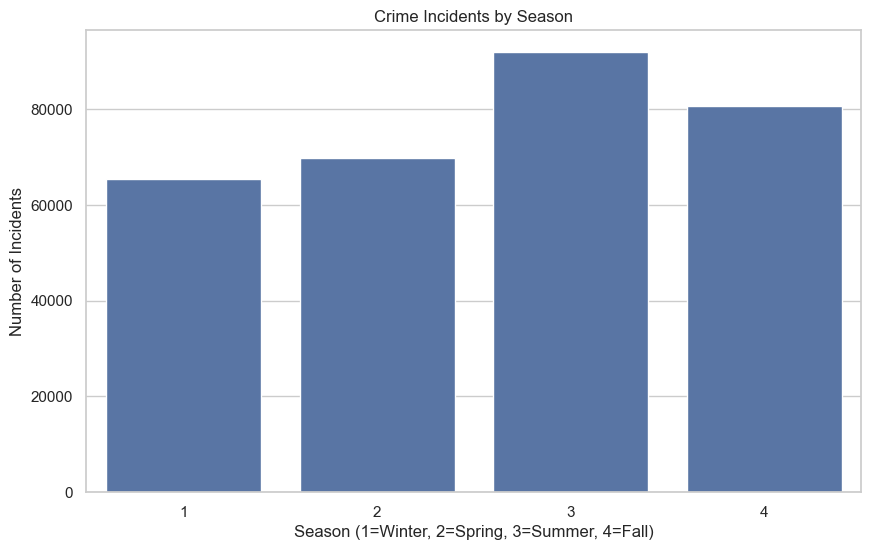

In [68]:
# 9 Group by season and count incidents
data['season'] = data['incident_date'].apply(lambda x: (x.month%12 + 3)//3)
seasonal_incidents = data['season'].value_counts().sort_index()

# Plot seasonal incidents
plt.figure(figsize=(10, 6))
sns.barplot(x=seasonal_incidents.index, y=seasonal_incidents.values)
plt.title('Crime Incidents by Season')
plt.xlabel('Season (1=Winter, 2=Spring, 3=Summer, 4=Fall)')
plt.ylabel('Number of Incidents')
plt.show()

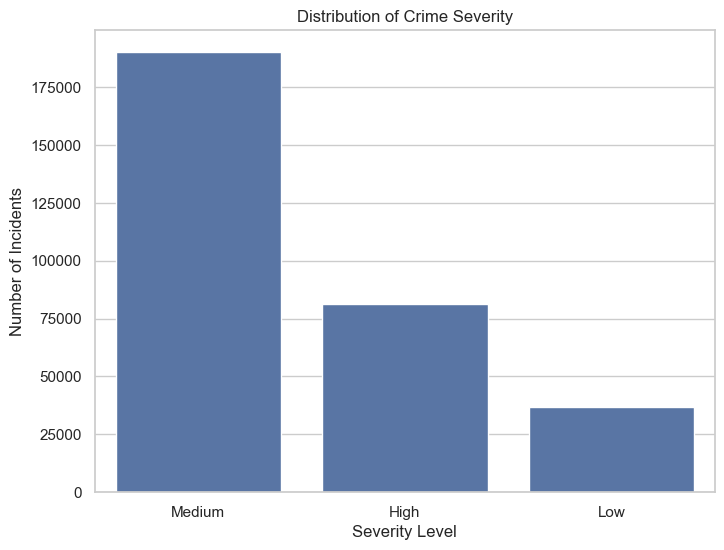

In [69]:
# 10 Count incidents by severity
severity_counts = data['severity'].value_counts()

# Plot severity distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=severity_counts.index, y=severity_counts.values)
plt.title('Distribution of Crime Severity')
plt.xlabel('Severity Level')
plt.ylabel('Number of Incidents')
plt.show()


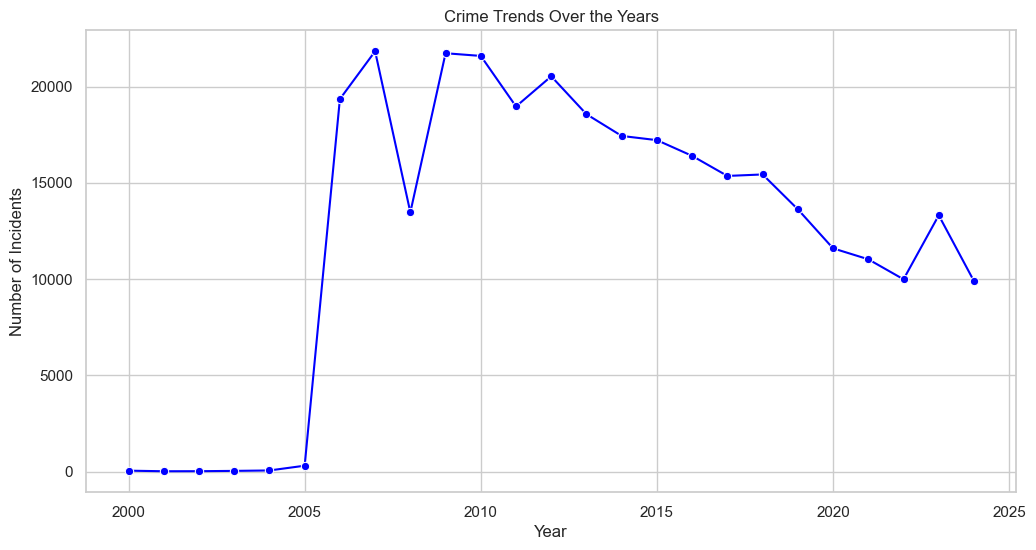

In [70]:
# 11 Group the data by year and month, then count incidents

yearly_arrests = data.groupby(['year']).size().reset_index(name='number_of_incidents')
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=yearly_arrests,
    x='year',
    y='number_of_incidents',
    marker='o',
    color='blue'
)

plt.title('Crime Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)

plt.show()


### Algorithms

In [79]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, silhouette_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, classification_report, confusion_matrix, r2_score

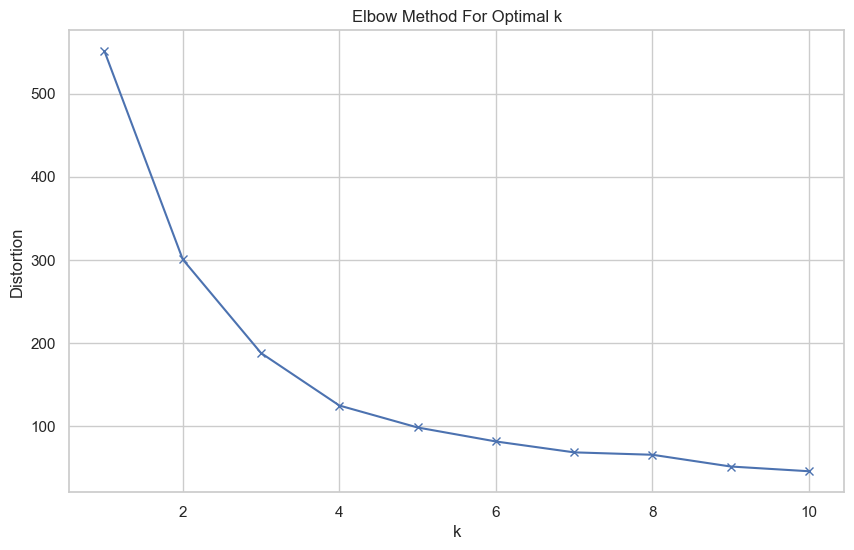

In [80]:

coordinates = data[['latitude', 'longitude']]

#Calculate distortion for a range of k values
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(coordinates)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()


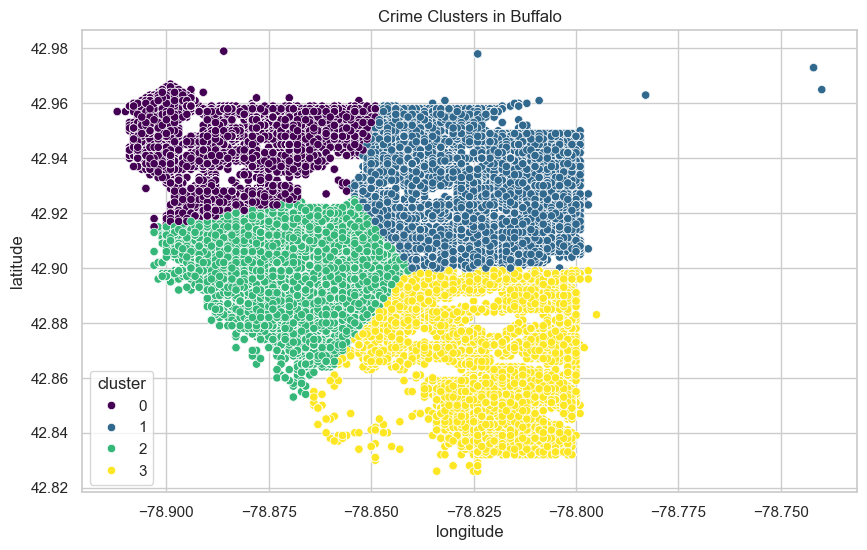

In [82]:
# 1. 
# k-Means Clustering

# choose the k value, based on the elbow method

coordinates = data[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=4)
data['cluster'] = kmeans.fit_predict(coordinates)

# Plotting Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=data, palette='viridis')
plt.title('Crime Clusters in Buffalo')
plt.show()


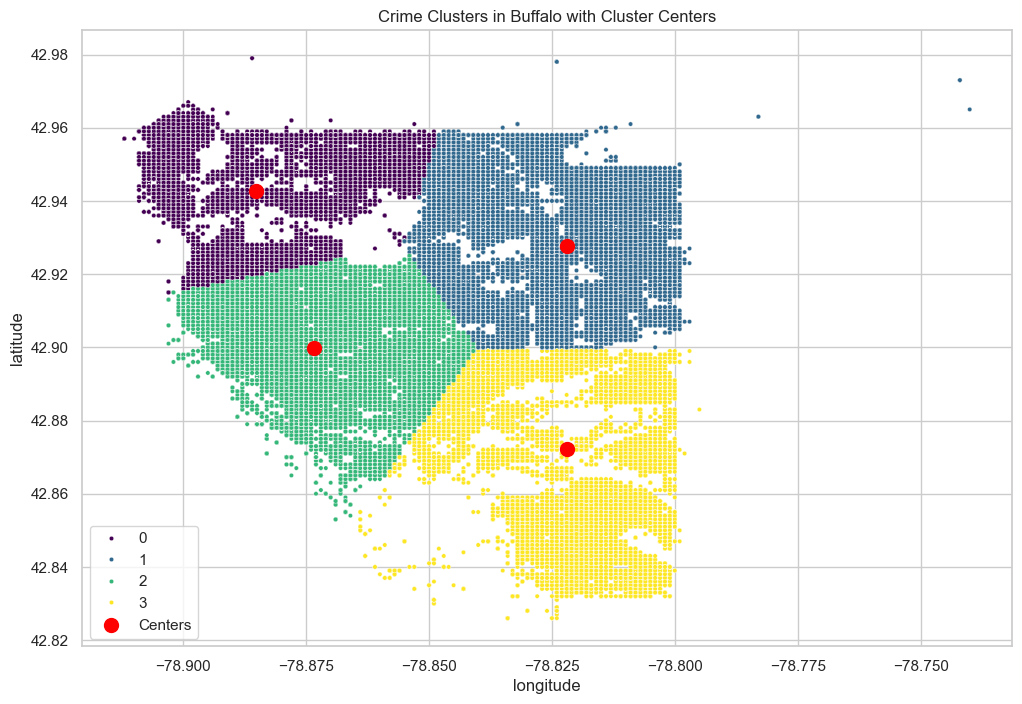

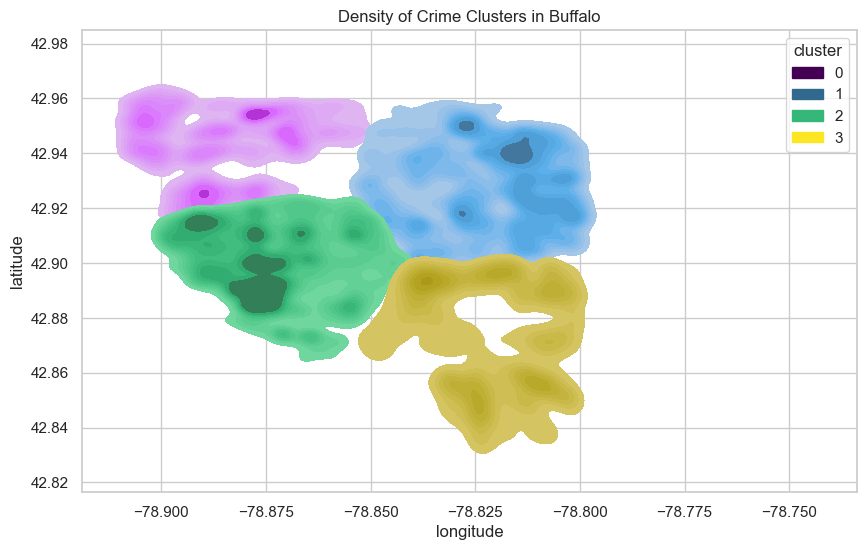

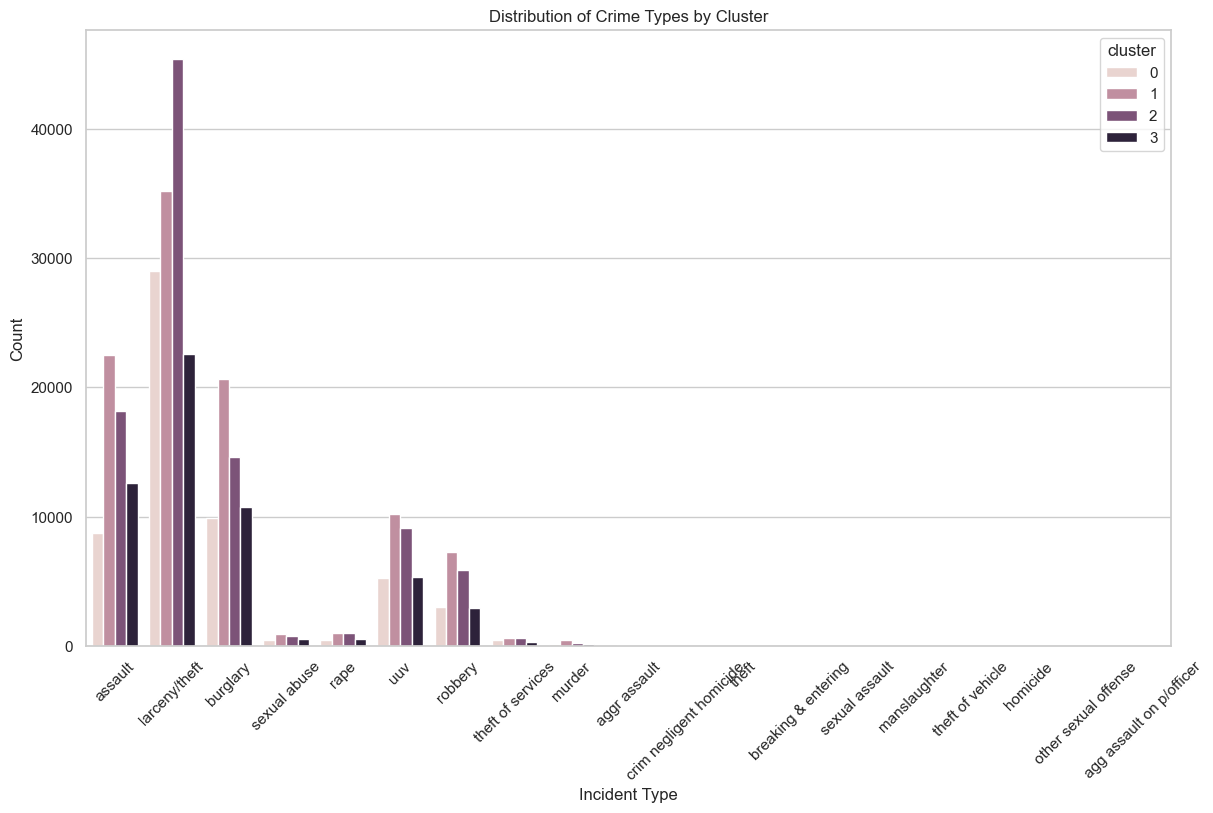

In [83]:
#Crime Clusters with Cluster Centers
plt.figure(figsize=(12, 8))
sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=data, palette='viridis', s=10)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=100, c='red', label='Centers')
plt.title('Crime Clusters in Buffalo with Cluster Centers')
plt.legend()
plt.show()

# Heatmap of Cluster Density
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='longitude', y='latitude', hue='cluster', fill=True, palette='viridis')
plt.title('Density of Crime Clusters in Buffalo')
plt.show()

# Distribution of Crime Types within Clusters
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x='incident_type_primary', hue='cluster')
plt.xticks(rotation=45)
plt.title('Distribution of Crime Types by Cluster')
plt.xlabel('Incident Type')
plt.ylabel('Count')
plt.show()

Accuracy: 0.7358051420838971


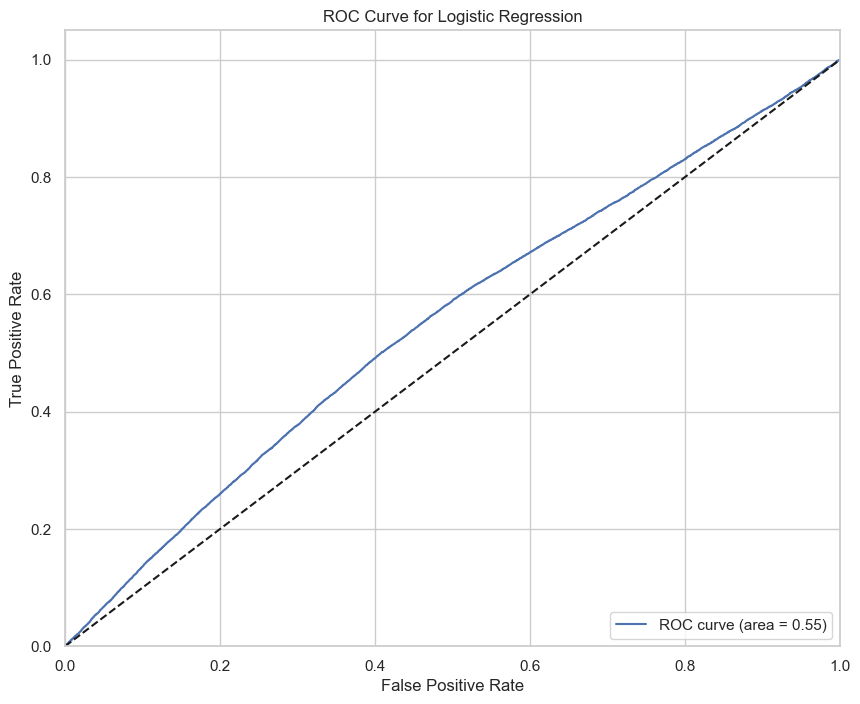

In [85]:
#2.
# Logistic regression

X_log = data[['hour_of_day', 'day_of_week', 'latitude', 'longitude', 'month', 'neighborhood']]
y_log = (data['severity'] == 'High').astype(int)

# Encode categorical data
label_encoders = {}
for column in ['day_of_week', 'neighborhood']:
    le = LabelEncoder()
    X_log[column] = le.fit_transform(X_log[column])
    label_encoders[column] = le

# Scale features
scaler = StandardScaler()
X_scaled_log = scaler.fit_transform(X_log)

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_scaled_log, y_log, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_log, y_train_log)
y_pred_log = log_reg.predict(X_test_log)

print(f'Accuracy: {accuracy_score(y_test_log, y_pred_log)}')

# ROC curve
y_test_binarized = label_binarize(y_test_log, classes=[0, 1])
fpr, tpr, _ = roc_curve(y_test_binarized, log_reg.predict_proba(X_test_log)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [88]:
# 3. 
# Naive Bayes 

X = data[['hour_of_day', 'latitude', 'longitude', 'neighborhood', 'year', 'month', 'day', 'police_district', 'severity']]
y = data['incident_type_primary']

label_encoders = {}
for column in ['neighborhood', 'police_district', 'severity']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))
    label_encoders[column] = le

y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy}")



Naive Bayes Accuracy: 0.7219269282814614


In [89]:
# conditional probabilities for each feature
for feature in X.columns:
    print(f"\nFeature: {feature}")
    for class_index in range(len(y_encoder.classes_)):
        if feature in ['latitude', 'longitude']:
            mean_value = np.mean(X_train[y_train == class_index][feature])
        else:
            mean_value = round(np.mean(X_train[y_train == class_index][feature]))
        
        print(f"Class {y_encoder.inverse_transform([class_index])[0]}: {mean_value}")



Feature: hour_of_day
Class agg assault on p/officer: 7
Class aggr assault: 12
Class assault: 12
Class breaking & entering: 7
Class burglary: 11
Class crim negligent homicide: 8
Class homicide: 10
Class larceny/theft: 12
Class manslaughter: 16
Class murder: 11
Class other sexual offense: 8
Class rape: 10
Class robbery: 13
Class sexual abuse: 10
Class sexual assault: 5
Class theft: 8
Class theft of services: 11
Class theft of vehicle: 9
Class uuv: 12

Feature: latitude
Class agg assault on p/officer: 42.900999999999996
Class aggr assault: 42.90466265060241
Class assault: 42.9089968695332
Class breaking & entering: 42.90843103448275
Class burglary: 42.91274421225159
Class crim negligent homicide: 42.902098039215694
Class homicide: 42.923
Class larceny/theft: 42.912277451149926
Class manslaughter: 42.91169230769231
Class murder: 42.91340625
Class other sexual offense: 42.93
Class rape: 42.909342637151106
Class robbery: 42.91397225363794
Class sexual abuse: 42.910249868490276
Class sexual 

In [90]:
import folium
from folium.plugins import HeatMap
from IPython.display import display

m = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=12)

larceny_theft_code = y_encoder.transform(['larceny/theft'])[0]
heat_data = [[row['latitude'], row['longitude']] for index, row in data.iterrows() 
             if index < len(y_pred) and y_pred[index] == larceny_theft_code]

HeatMap(heat_data).add_to(m)

display(m)

Random Forest Accuracy: 0.7361732070365359
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        38
           2       0.77      0.97      0.86     18542
           3       0.00      0.00      0.00        26
           4       0.55      0.31      0.40     16824
           5       0.00      0.00      0.00        20
           7       0.75      0.89      0.81     39638
           8       0.00      0.00      0.00         4
           9       0.50      0.01      0.01       279
          11       0.39      0.03      0.06       866
          12       0.47      0.08      0.14      5823
          13       0.45      0.07      0.13       811
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00        11
          16       0.43      0.02      0.03       600
          17       0.00      0.00      0.00         1
          18       0.83      0.99     

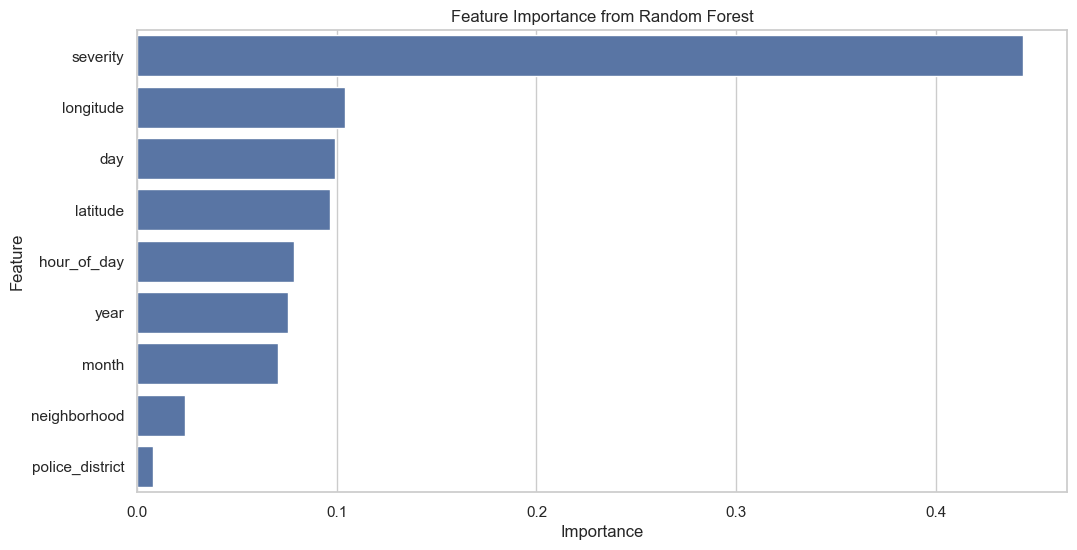

<Figure size 2000x2000 with 0 Axes>

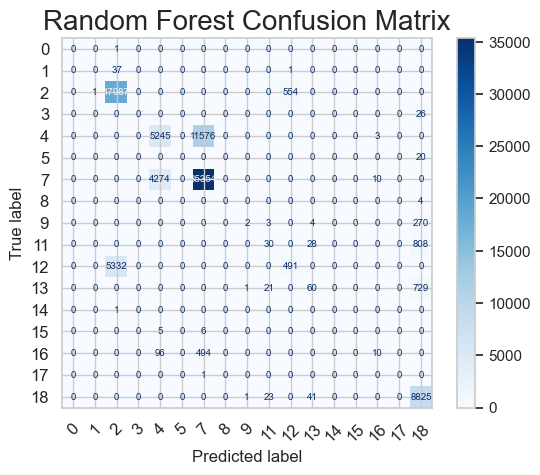

In [91]:
# 4. 
#Random Forest

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

#Feature Importance
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


y_pred_rf = random_forest.predict(X_test)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

unique_labels = np.unique(y_test)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=unique_labels)

plt.figure(figsize=(20, 20)) 
ax = disp_rf.plot(cmap='Blues', values_format='d')
plt.title('Random Forest Confusion Matrix', fontsize=20)  
plt.xticks(fontsize=12, rotation=45)  
plt.yticks(fontsize=12)  

for text in ax.text_.ravel():
    text.set_fontsize(7)

plt.show()

In [92]:
# 5. 
# Support Vector Machine

# Features and target
X = data[['hour_of_day', 'latitude', 'longitude', 'month']]
y = (data['severity'] == 'High').astype(int)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy}")


SVM Accuracy: 0.7358051420838971


In [94]:
#6.
# XGBoost

label_encoder = LabelEncoder()
categorical_columns = ['day_of_week', 'neighborhood', 'council_district']

crime_data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Encode crime type 
crime_data_encoded['incident_type_encoded'] = label_encoder.fit_transform(data['incident_type_primary'])

X = crime_data_encoded[['hour_of_day', 'latitude', 'longitude', 'month', 'season']]
y = crime_data_encoded['incident_type_encoded']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy}")

labels_in_training = sorted(list(set(y_train)))

print(classification_report(y_test, y_pred, labels=labels_in_training, target_names=label_encoder.classes_))


XGBoost Accuracy: 0.4501109607577808
                          precision    recall  f1-score   support

agg assault on p/officer       0.00      0.00      0.00         1
            aggr assault       0.00      0.00      0.00        38
                 assault       0.34      0.28      0.31     18542
     breaking & entering       0.00      0.00      0.00        26
                burglary       0.35      0.09      0.14     16824
 crim negligent homicide       0.00      0.00      0.00        20
                homicide       0.00      0.00      0.00         0
           larceny/theft       0.48      0.88      0.62     39638
            manslaughter       0.00      0.00      0.00         4
                  murder       0.00      0.00      0.00       279
    other sexual offense       0.00      0.00      0.00         0
                    rape       0.00      0.00      0.00       866
                 robbery       0.28      0.00      0.01      5823
            sexual abuse       0.50   